In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('sales_data.xlsx')

In [3]:
df.head()

,Full Name,First Name,Last Name,Title,Job Functions,Work Email,Direct Phone,LinkedIn URL,Company Name,Website,Primary Industry,City,State
0,Steven Latham,Steven,Latham,"Manager, Information Technology",IT Operations,slatham@spec.coop,(806) 775-7762,www.linkedin.com/in/steven-latham-56825566,South Plains Electric Cooperative,www.spec.coop,Energy / Utilities,Lubbock,TX
1,Brian McCabe,Brian,McCabe,"Executive VP, Information Technology","Chief Information Officer, Chief Information O...",brian.mccabe@southside.com,(903) 531-7116,https://www.linkedin.com/in/brian-mccabe-40a08147,Southside Bank,www.southside.com,Financial Services,Tyler,TX
2,Bj Jones,Bj,Jones,"Vice President, Information Technology Systems...",IT Operations,bj@southstarcommunities.com,NaN,https://www.linkedin.com/in/bjjones,SouthStar Communities,www.southstarcommunities.com,Construction,Austin,TX
3,Josh Mayer,Josh,Mayer,"Manager, Information Technology",IT Operations,jmayer@swacu.org,(214) 357-5577 x243,https://www.linkedin.com/in/josh-mayer-3146b328/,Southwest Airlines Federal Credit Union,www.swacu.org,Banking,Dallas,TX
4,Bryan Pittman,Bryan,Pittman,"Vice President, Information Technology",IT Operations,bpittman@swacu.org,(214) 357-5577 x210,https://www.linkedin.com/in/bryanpittman/,Southwest Airlines Federal Credit Union,www.swacu.org,Banking,Dallas,TX


In [4]:
cols = [1,2,5,6,7,9]
df.drop(df.columns[cols], axis = 1, inplace = True)

In [5]:
df['Title'] = df["Title"].str.split(',').str[0]

In [6]:
df.head()

,Full Name,Title,Job Functions,Company Name,Primary Industry,City,State
0,Steven Latham,Manager,IT Operations,South Plains Electric Cooperative,Energy / Utilities,Lubbock,TX
1,Brian McCabe,Executive VP,"Chief Information Officer, Chief Information O...",Southside Bank,Financial Services,Tyler,TX
2,Bj Jones,Vice President,IT Operations,SouthStar Communities,Construction,Austin,TX
3,Josh Mayer,Manager,IT Operations,Southwest Airlines Federal Credit Union,Banking,Dallas,TX
4,Bryan Pittman,Vice President,IT Operations,Southwest Airlines Federal Credit Union,Banking,Dallas,TX


In [7]:
df.describe()

,Full Name,Title,Job Functions,Company Name,Primary Industry,City,State
count,149,149,149,149,149,149,149
unique,149,15,23,130,32,49,4
top,Scott Lee,Director,IT Operations,Targetbase,Hospitals / Health Care,Houston,TX
freq,1,60,92,3,18,33,145


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 7 columns):
Full Name           149 non-null object
Title               149 non-null object
Job Functions       149 non-null object
Company Name        149 non-null object
Primary Industry    149 non-null object
City                149 non-null object
State               149 non-null object
dtypes: object(7)
memory usage: 8.3+ KB


In [9]:
df = df.drop_duplicates(df.columns)

In [10]:
df.head()

,Full Name,Title,Job Functions,Company Name,Primary Industry,City,State
0,Steven Latham,Manager,IT Operations,South Plains Electric Cooperative,Energy / Utilities,Lubbock,TX
1,Brian McCabe,Executive VP,"Chief Information Officer, Chief Information O...",Southside Bank,Financial Services,Tyler,TX
2,Bj Jones,Vice President,IT Operations,SouthStar Communities,Construction,Austin,TX
3,Josh Mayer,Manager,IT Operations,Southwest Airlines Federal Credit Union,Banking,Dallas,TX
4,Bryan Pittman,Vice President,IT Operations,Southwest Airlines Federal Credit Union,Banking,Dallas,TX


In [11]:
df.mean()

Series([], dtype: float64)

In [12]:
df['Job Functions'].describe()

count               149
unique               23
top       IT Operations
freq                 92
Name: Job Functions, dtype: object

In [13]:
pp.ProfileReport(df)

In [14]:
df['Job_Functions'] = df['Job_Functions'].str.split(',').str[0]

In [15]:
df.head()

,Full_Name,Title,Job_Functions,Company_Name,Primary_Industry,City,State
0,Steven Latham,Manager,IT Operations,South Plains Electric Cooperative,Energy / Utilities,Lubbock,TX
1,Brian McCabe,Executive VP,Chief Information Officer,Southside Bank,Financial Services,Tyler,TX
2,Bj Jones,Vice President,IT Operations,SouthStar Communities,Construction,Austin,TX
3,Josh Mayer,Manager,IT Operations,Southwest Airlines Federal Credit Union,Banking,Dallas,TX
4,Bryan Pittman,Vice President,IT Operations,Southwest Airlines Federal Credit Union,Banking,Dallas,TX


In [16]:
from sklearn.preprocessing import LabelEncoder

n_Full_Name = LabelEncoder()
n_Title = LabelEncoder()
n_Job_Functions = LabelEncoder()
n_Company_Name= LabelEncoder()
n_Primary_Industry   = LabelEncoder()
n_City = LabelEncoder()
n_State = LabelEncoder()

In [17]:
df['Name'] = n_Full_Name.fit_transform(df['Full_Name'])
df['Desgn'] = n_Title.fit_transform(df['Title'])
df['Job_function'] = n_Job_Functions.fit_transform(df['Job_Functions'])
df['Company'] = n_Company_Name.fit_transform(df['Company_Name'])
df['Industry'] = n_Primary_Industry.fit_transform(df['Primary_Industry'])
df['City'] = n_City.fit_transform(df['City'])
df['State'] = n_State.fit_transform(df['State'])

In [18]:
cols = [0,1,2,3,4]
df.drop(df.columns[cols], axis = 1, inplace = True)

In [19]:
df

,City,State,Name,Desgn,Job_function,Company,Industry
0,29,3,140,9,3,2,9
1,46,3,12,6,0,5,10
2,3,3,9,14,3,3,8
3,9,3,73,9,3,6,4
4,9,3,13,14,3,6,4
5,9,3,45,9,0,7,12
6,20,3,113,9,3,8,18
7,20,3,105,5,3,9,16
8,9,3,39,5,3,10,1
9,20,3,31,9,3,11,21


Text(0, 0.5, 'Industry')

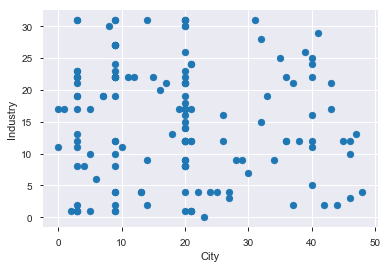

In [23]:
plt.scatter(df.City,df['Industry'])
plt.xlabel('City')
plt.ylabel('Industry')

In [24]:
df.skew()

City            0.543318
State          -6.889072
Name            0.000000
Desgn           0.532923
Job_function    1.015181
Company         0.031176
Industry        0.075340
dtype: float64

In [25]:
scaler = MinMaxScaler()

scaler.fit(df[['City']])
df['City'] = scaler.transform(df[['City']])

scaler.fit(df[['Industry']])
df['Industry'] = scaler.transform(df[['Industry']])

C:\Users\Nitish\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Nitish\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [26]:
df

,City,State,Name,Desgn,Job_function,Company,Industry
0,0.604167,3,140,9,3,2,0.290323
1,0.958333,3,12,6,0,5,0.322581
2,0.062500,3,9,14,3,3,0.258065
3,0.187500,3,73,9,3,6,0.129032
4,0.187500,3,13,14,3,6,0.129032
5,0.187500,3,45,9,0,7,0.387097
6,0.416667,3,113,9,3,8,0.580645
7,0.416667,3,105,5,3,9,0.516129
8,0.187500,3,39,5,3,10,0.032258
9,0.416667,3,31,9,3,11,0.677419


In [27]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['City','Industry']])
    sse.append(km.inertia_)

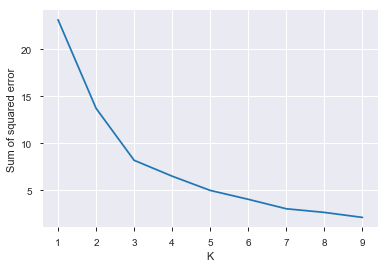

In [28]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

Text(0, 0.5, 'Industry')

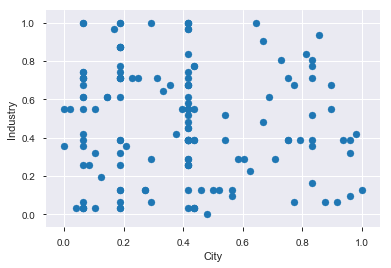

In [29]:
plt.scatter(df.City,df['Industry'])
plt.xlabel('City')
plt.ylabel('Industry')

In [31]:

km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['City','Industry']])
y_predicted

array([2, 2, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 2, 1, 1, 0, 2, 2, 0, 0, 0,
       0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 0, 2, 1, 0, 2, 1, 1, 1, 1, 2, 1, 0,
       2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 2, 2, 1, 1, 0, 2, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 1, 2, 0, 2, 0, 1, 0, 2, 1, 2, 0,
       1, 1, 1, 1, 2, 0, 2, 2, 0, 0, 1, 2, 0, 1, 0, 0, 2, 1, 2, 1, 1, 1,
       1, 1, 2, 0, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 1, 1, 1, 1, 1])

In [32]:
df['cluster']=y_predicted
df.head()

,City,State,Name,Desgn,Job_function,Company,Industry,cluster
0,0.604167,3,140,9,3,2,0.290323,2
1,0.958333,3,12,6,0,5,0.322581,2
2,0.062500,3,9,14,3,3,0.258065,0
3,0.187500,3,73,9,3,6,0.129032,0
4,0.187500,3,13,14,3,6,0.129032,0


In [33]:
km.cluster_centers_

array([[0.29092262, 0.22523041],
       [0.26412429, 0.74521597],
       [0.79840686, 0.44402277]])

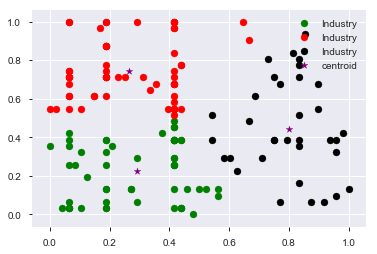

In [34]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.City,df1['Industry'],color='green')
plt.scatter(df2.City,df2['Industry'],color='red')
plt.scatter(df3.City,df3['Industry'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()